# Roche potential

Compute Roche potential for a binary configuration

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src')

import roche
from utils import Constants, rlobe
import numpy as np
import matplotlib.pyplot as plt

# load some constants
c = Constants()

### Create binary configuration

Remember that input masses must be in M$_\odot$ and separation in R$_\odot$ (in case orbital period is given, units for it must be days)

In [2]:
m1 = 10
m2 = 5
a = 10
R = roche.Roche(m1=m1, m2=m2, a=a)

#### Create meshgrid for computing Roche potential

In [3]:
N = 1000
x = np.linspace(-3*R.a, 3*R.a, N)
y = np.linspace(-3*R.a, 3*R.a, N)
X, Y = np.meshgrid(x, y)
V = R.V(X, Y)

# get Lagrangian points
xL1, VL1 = R.L1()
xL2, VL2 = R.L2()
xL3, VL3 = R.L3()

#### Plot potential and Lagrangian equipotentials on the (x, y) plane !

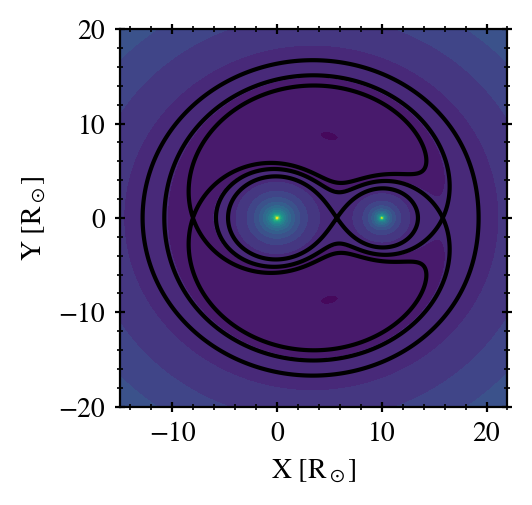

In [4]:
plt.style.use('style.mpl')
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.set_xlim([-15,22])
ax.set_ylim([-20,20])
ax.set_xlabel('X [R$_\\odot$]')
ax.set_ylabel('Y [R$_\\odot$]')

ax.contourf(X/c.Rsun, Y/c.Rsun, np.log10(-V), 20)
# L1
ax.contour(X/c.Rsun, Y/c.Rsun, -V, [-VL1], colors='black')
# L2
ax.contour(X/c.Rsun, Y/c.Rsun, -V, [-VL2], colors='black')
# L3
ax.contour(X/c.Rsun, Y/c.Rsun, -V, [-VL3], colors='black');

### Compute volume and effective radii for the Roche lobe model (equipotential of the L1 point)

Additionally, compute the radii values for different binary configurations (dependent on the mass-ratio, $q$) following Eggleton (1983) formula.

In [5]:
q = np.linspace(0.01, 0.99, 150)

Reff = np.zeros(len(q))
Reff2 = np.zeros(len(q))
RL = np.zeros(len(q))

for k,qval in enumerate(q):
    
    # variable mass-ratio
    m2 = qval * m1
    
    R = roche.Roche(m1=m1, m2=m2, a=a)
    
    # get effective radii of more massive star, using L1 point
    Reff[k] = R.eq_vol(star_id=1, lagrangian_point='L1')[1]
    # and get the same value from Eggleton formula
    RL[k] = rlobe(m1, m2)
    
    # now compute effective radii of more massive star but for the L2 point
    Reff2[k] = R.eq_vol(star_id=1, lagrangian_point='L2')[1] / RL[k]  # normalize to Roche radii

#### Plot it !

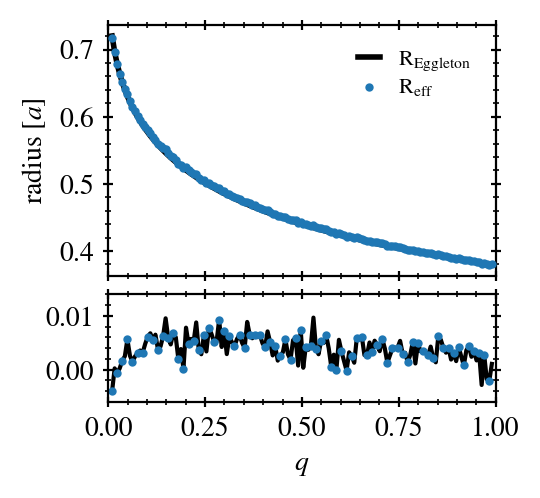

In [6]:
plt.style.use('style.mpl')
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(2.5,2.5), sharex=True, gridspec_kw={'height_ratios': [3.5, 1.5], 'hspace': 0.1})
axs[1].set_xlim([0,1])
axs[1].set_xlabel('$q$')
axs[0].set_ylabel('radius [$a$]')

axs[0].scatter(q, Reff, s=4, label='R$_{\\rm eff}$', color='C0', zorder=99)
axs[0].plot(q, RL, lw=2, label='R$_{\\rm Eggleton}$', color='black')

axs[1].set_ylim([-0.006, 0.014])
axs[1].plot(q, (Reff - RL) / RL, color='black', marker='o', markevery=2, markersize=2, markerfacecolor='C0', markeredgecolor='C0')

axs[0].legend(handlelength=1);

### Do the same exercise but for the L2 equipotential around more massive star

In [7]:
def misra_l2(q):
    '''Formulae for the radii of the L2 from Misra et al. (2020)
    '''
    return 0.784 * np.power(q, 1.05) * np.exp(-0.188*q) + 1.004

def marchant_l2(q):
    '''Formulae for the radii of the L2 from Marchant et al. (2021)
    '''
    sigma = 49.4 / (12.2 + np.power(q, 0.208))
    ft = 2.74 / (1 + ((np.log(q) + 1.02)/sigma)**2)
    st = 1 / (7.13 + np.power(q, -0.386))
    return 1 +  (ft * st)

def eggleton_l2(q):
    '''Formulae for the radii of the L2 from Eggleton's book (2006)
    '''
    num = 0.49 * np.power(q, 2/3) + 0.27 * q - 0.12 * np.power(q,4/3)
    den = 0.6 * np.power(q, 2/3) + np.log(1 + np.power(q, 1/3))
    return num / den

#### plot it !

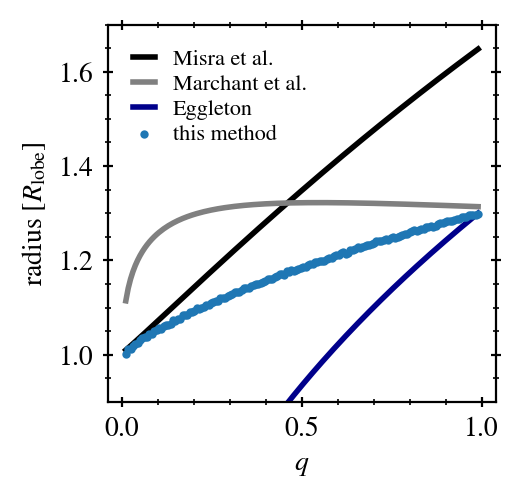

In [8]:
plt.style.use('style.mpl')
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.set_ylim([0.9,1.7])
ax.set_xlabel('$q$')
ax.set_ylabel('radius [$R_{\\rm lobe}$]')

ax.plot(q, misra_l2(q), lw=2, color='black', label='Misra et al.')
ax.plot(q, marchant_l2(q), lw=2, color='gray', label='Marchant et al.')
ax.plot(q, eggleton_l2(q)/RL, lw=2, color='darkblue', label='Eggleton')
ax.scatter(q, Reff2, s=4, label='this method', zorder=99)

ax.legend(handlelength=1);